# TASK 1: Data preparation and customer analytics

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load data
customer = pd.read_csv('datasets/QVI_purchase_behaviour.csv')
transaction = pd.read_excel('datasets/QVI_transaction_data.xlsx')

# Transaction Data

In [3]:
# Overview data
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
# Overview data
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
transaction.shape

(264836, 8)

In [6]:
# Reformat data type of 'DATE' column
transaction["DATE"]=pd.to_datetime(transaction["DATE"], origin = "1899-12-30",unit="D")

In [7]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
# Find duplicate values
duplicates = transaction.duplicated(subset=transaction.columns, keep = False)
transaction[duplicates]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [9]:
# Drop dubplicate
transaction.drop_duplicates(inplace = True)

In [10]:
# Counting missing values
transaction.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [11]:
# Examine 'PROD_NAME' column
transaction['PROD_NAME'].head()

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
Name: PROD_NAME, dtype: object

In [12]:
# Extract weights out of 'PROD_NAME'
transaction['PACK_SIZE'] = transaction['PROD_NAME'].str.extract('(\d+)')
transaction['PACK_SIZE'] = pd.to_numeric(transaction['PACK_SIZE'])
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [13]:
# Remove special characters
transaction['PROD_NAME'] = transaction['PROD_NAME'].str.replace('[&,/]', ' ')
# Remove weights
transaction['PROD_NAME'] = transaction['PROD_NAME'].str[:-4]
# Remove leading & trailing white space
transaction['PROD_NAME'] = transaction['PROD_NAME'].str.strip()
transaction

<ipython-input-13-95a0ed35e3d4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  transaction['PROD_NAME'] = transaction['PROD_NAME'].str.replace('[&,/]', ' ')


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,175
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,175
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,170
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,150


In [14]:
# Remove 'Salsa' products 
transaction = transaction[~transaction['PROD_NAME'].str.contains(r'[Ss]alsa')]

In [15]:
# Examine 'PROD_QTY' feature
transaction['PROD_QTY'].value_counts()

2      220069
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64

In [16]:
transaction.sort_values(by='PROD_QTY', ascending=False).head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380
135446,2019-05-19,154,154337,154834,99,Pringles Sthrn FriedChicken,5,18.5,134
135274,2018-08-16,66,66128,63432,68,Pringles Chicken Salt Crips,5,18.5,134
150472,2019-05-16,58,58176,53591,99,Pringles Sthrn FriedChicken,5,18.5,134


In [17]:
# There are two transactions where 200 packets of chips are bought in one transaction and both of these transactions were by the same customer
# It looks like the customer has only had the two transactions over the year and is not an ordinary retail customer. 
# The customer might be buying chips for commercial purposes instead.
# Remove this customer 
transaction = transaction[transaction["PROD_QTY"] < 6]

In [18]:
len(transaction[transaction["LYLTY_CARD_NBR"] == 226000])

0

In [19]:
# Examine 'DATE' feature
transaction['DATE'].nunique()

364

In [20]:
# Finding missing value
pd.date_range(start=transaction['DATE'].min(), end=transaction['DATE'].max()).difference(transaction['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [21]:
# Create pivot_table sorts TOT_SALES for each DATE
pv = transaction.pivot_table(values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')
pv.head()

,TOT_SALES
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [22]:
# Create a column of dates that includes every day from 1 Jul 2018 to 30 Jun 2019
new = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
new['TOT_SALES'] = 0
new

,TOT_SALES
2018-07-01,0
2018-07-02,0
2018-07-03,0
2018-07-04,0
2018-07-05,0
...,...
2019-06-26,0
2019-06-27,0
2019-06-28,0
2019-06-29,0


In [23]:
combine = pv + new
combine.fillna(0, inplace = True)

In [24]:
combine.head()

,TOT_SALES
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [25]:
combine.index.name = 'Date'
combine.rename(columns = {'TOT_SALES' : 'Total Sales'}, inplace = True)
combine.head()

,Total Sales
Date,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


Text(0.5, 1.0, 'Total Sales from from 1 Jul 2018 to 30 Jun 2019')

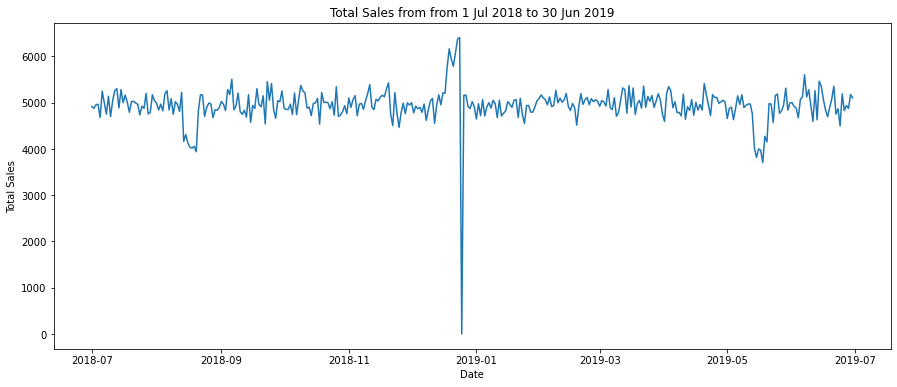

In [26]:
#Create graph Total Sales from 1 Jul 2018 to 30 Jun 2019
plt.figure(figsize=(15,6))
sns.lineplot(data=combine, x='Date', y = 'Total Sales')
plt.title('Total Sales from from 1 Jul 2018 to 30 Jun 2019')

In [27]:
# We can see that there is an increase in purchases in December and a break in late December. Let's zoom in on this.
# Extract data in December
combine_december= combine.loc['2018-12-01':'2018-12-31']
combine_december

,Total Sales
Date,
2018-12-01,5000.9
2018-12-02,4781.1
2018-12-03,4927.0
2018-12-04,4869.4
2018-12-05,4900.5
2018-12-06,4792.9
2018-12-07,4971.7
2018-12-08,4618.4
2018-12-09,4844.8


Text(0.5, 1.0, 'Total Sales in December')

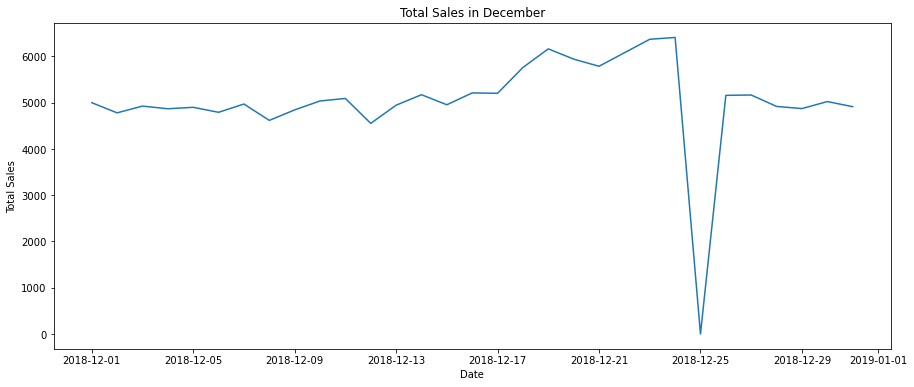

In [28]:
# Graph of Total Sales in December
plt.figure(figsize=(15,6))
sns.lineplot(data=combine_december, x = 'Date', y = 'Total Sales')
plt.title('Total Sales in December')

In [29]:
# We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. 
# This is due to shops being closed on Christmas day
# Move on PACK_SIZE
transaction['PACK_SIZE'].unique()

array([175, 170, 150, 330, 210, 270, 220, 125, 110, 134, 380, 180, 165,
       135, 250, 200, 160, 190,  90,  70], dtype=int64)

<AxesSubplot:>

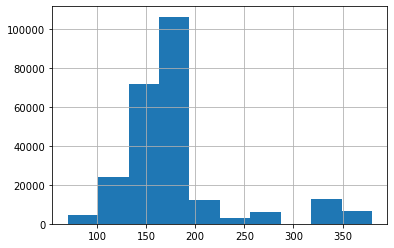

In [30]:
# The largest size is 380g and the smallest size is 70g
# Check the distribution of 'PACK_SIZE'
transaction['PACK_SIZE'].hist()

In [31]:
# Extract brand name from 'PROD_NAME' by creating 'BRAND' column
part = transaction['PROD_NAME'].str.partition()
transaction['BRAND'] = part[0]
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150,Kettle


In [32]:
transaction['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [33]:
# Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red Rock Deli chips. 
# Let's combine these together
transaction['BRAND'].replace('NCC','Natural', inplace = True)
transaction['BRAND'].replace('Smith','Smiths', inplace = True)
transaction['BRAND'].replace(['Grain','GrnWves'],'Grainwaves', inplace = True)
transaction['BRAND'].replace('Dorito','Doritos', inplace = True)
transaction['BRAND'].replace('WW','Woolworths', inplace = True)
transaction['BRAND'].replace('Infzns','Infuzions', inplace = True)
transaction['BRAND'].replace(['RRD','Red'],'Red Rock Deli', inplace = True)
transaction['BRAND'].replace('Snbts','Sunbites', inplace = True)

transaction['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grainwaves', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

<AxesSubplot:ylabel='BRAND'>

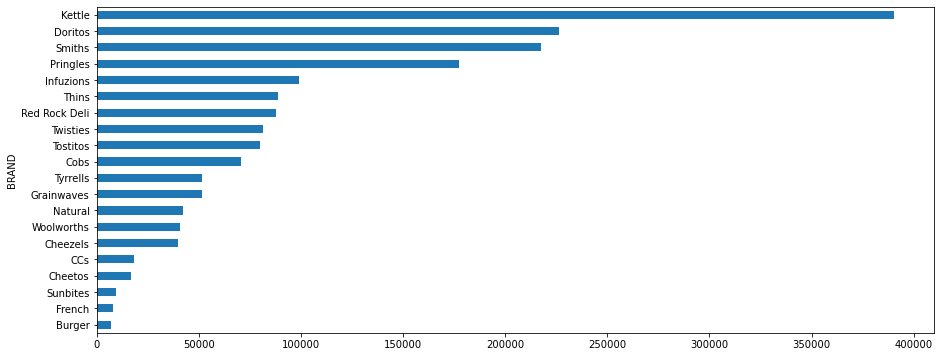

In [34]:
# Which BRAND has the most sales?
transaction.groupby('BRAND').TOT_SALES.sum().sort_values(ascending = True).plot(kind='barh', figsize = (15,6))

# Customer Data

In [35]:
# let's have a look at the 'customer' dataset
customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [36]:
len(customer['LYLTY_CARD_NBR']) == customer['LYLTY_CARD_NBR'].nunique()

True

In [37]:
# 'LYLTY_CARD_NBR' is unique each row
# Check 'LIFESTAGE' column
customer['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [38]:
# Counting for each lifestages
customer['LIFESTAGE'].value_counts().sort_values(ascending = False)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

<AxesSubplot:xlabel='count', ylabel='LIFESTAGE'>

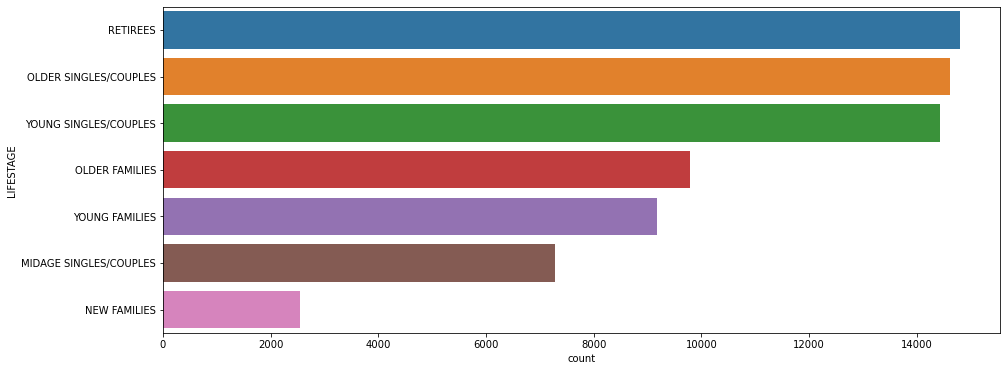

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(y= customer['LIFESTAGE'],order= customer['LIFESTAGE'].value_counts().index)

In [40]:
# Check 'PREMIUM_CUSTOMER' column
customer['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending = False)

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

<AxesSubplot:xlabel='count', ylabel='PREMIUM_CUSTOMER'>

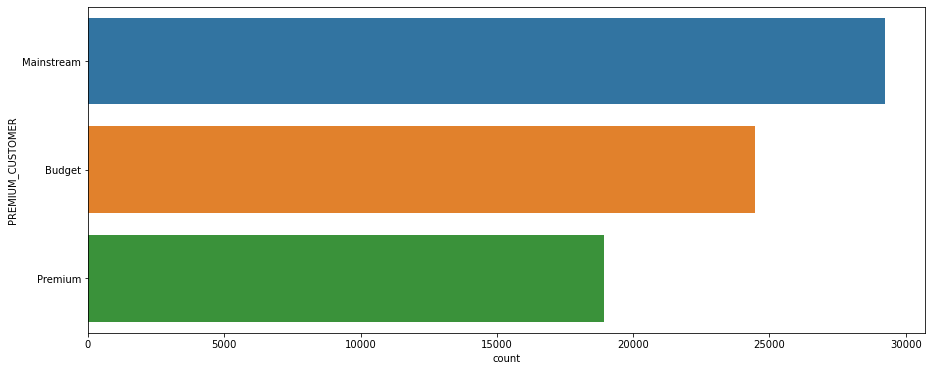

In [41]:
plt.figure(figsize=(15,6))
sns.countplot(y= customer['PREMIUM_CUSTOMER'],order= customer['PREMIUM_CUSTOMER'].value_counts().index)

# Merged data

In [42]:
merged_data = transaction.merge(customer, on = 'LYLTY_CARD_NBR')

In [43]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [44]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246739 entries, 0 to 246738
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246739 non-null  datetime64[ns]
 1   STORE_NBR         246739 non-null  int64         
 2   LYLTY_CARD_NBR    246739 non-null  int64         
 3   TXN_ID            246739 non-null  int64         
 4   PROD_NBR          246739 non-null  int64         
 5   PROD_NAME         246739 non-null  object        
 6   PROD_QTY          246739 non-null  int64         
 7   TOT_SALES         246739 non-null  float64       
 8   PACK_SIZE         246739 non-null  int64         
 9   BRAND             246739 non-null  object        
 10  LIFESTAGE         246739 non-null  object        
 11  PREMIUM_CUSTOMER  246739 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.5+ MB


In [45]:
merged_data.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

# Data analysis on customer segments

Now that the data is ready for analysis, we can define some metrics of interest to the client:
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

In [46]:
# Total sales by 'PREMIUM_CUSTOMER' and 'LIFESTAGE'
sales = pd.DataFrame(merged_data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).TOT_SALES.sum())
sales.rename(columns ={'TOT_SALES':'Total Sales'},inplace = True)
sales.sort_values(by='Total Sales',ascending = False, inplace = True)
sales                     

Total Sales
PREMIUM_CUSTOMER LIFESTAGE                          
Budget           OLDER FAMILIES            156863.75
Mainstream       YOUNG SINGLES/COUPLES     147582.20
                 RETIREES                  145168.95
Budget           YOUNG FAMILIES            129717.95
                 OLDER SINGLES/COUPLES     127833.60
Mainstream       OLDER SINGLES/COUPLES     124648.50
Premium          OLDER SINGLES/COUPLES     123531.55
Budget           RETIREES                  105916.30
Mainstream       OLDER FAMILIES             96413.55
Premium          RETIREES                   91296.65
Mainstream       YOUNG FAMILIES             86338.25
                 MIDAGE SINGLES/COUPLES     84734.25
Premium          YOUNG FAMILIES             78571.70
                 OLDER FAMILIES             75242.60
Budget           YOUNG SINGLES/COUPLES      57122.10
Premium          MIDAGE SINGLES/COUPLES     54443.85
                 YOUNG SINGLES/COUPLES      39052.30
Budget           MIDAGE SINGLES/COUPLES     33345.70
                 NEW FAMILIES               20607.45
Mainstream       NEW FAMILIES               15979.70
Premium          NEW FAMILIES               10760.80

<AxesSubplot:title={'center':'Total Sales by Customer Segments'}, xlabel='LIFESTAGE'>

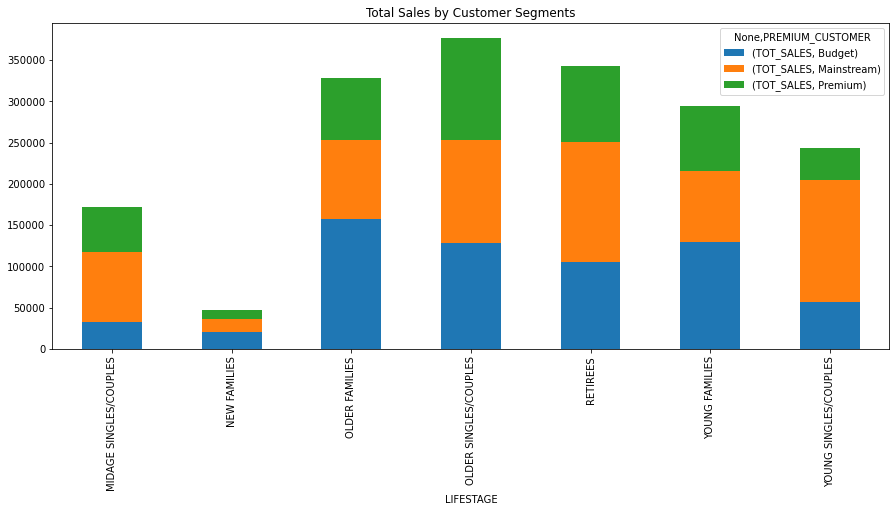

In [47]:
# Visualization
sales_plot = pd.DataFrame(merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())
sales_plot.unstack().plot(kind='bar',stacked =True, figsize=(15,6), title = 'Total Sales by Customer Segments')
#Comment: Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees

In [48]:
# Let's see if the higher sales are due to there being more customers who buy chips.
# Number of customers by 'LIFESTAGE' and 'PREMIUM_CUSTOMER'
customers = pd.DataFrame(merged_data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).LYLTY_CARD_NBR.nunique())
customers.rename(columns = {'LYLTY_CARD_NBR':'Number of Customers'}, inplace = True)
customers.sort_values(by = 'Number of Customers', ascending = False)
customers

Number of Customers
PREMIUM_CUSTOMER LIFESTAGE                                  
Budget           MIDAGE SINGLES/COUPLES                 1474
                 NEW FAMILIES                           1087
                 OLDER FAMILIES                         4611
                 OLDER SINGLES/COUPLES                  4849
                 RETIREES                               4385
                 YOUNG FAMILIES                         3953
                 YOUNG SINGLES/COUPLES                  3647
Mainstream       MIDAGE SINGLES/COUPLES                 3298
                 NEW FAMILIES                            830
                 OLDER FAMILIES                         2788
                 OLDER SINGLES/COUPLES                  4858
                 RETIREES                               6358
                 YOUNG FAMILIES                         2685
                 YOUNG SINGLES/COUPLES                  7917
Premium          MIDAGE SINGLES/COUPLES                 2369
                 NEW FAMILIES                            575
                 OLDER FAMILIES                         2231
                 OLDER SINGLES/COUPLES                  4682
                 RETIREES                               3812
                 YOUNG FAMILIES                         2398
                 YOUNG SINGLES/COUPLES                  2480

<AxesSubplot:title={'center':'Number of Customers by Customer Segments'}, xlabel='LIFESTAGE'>

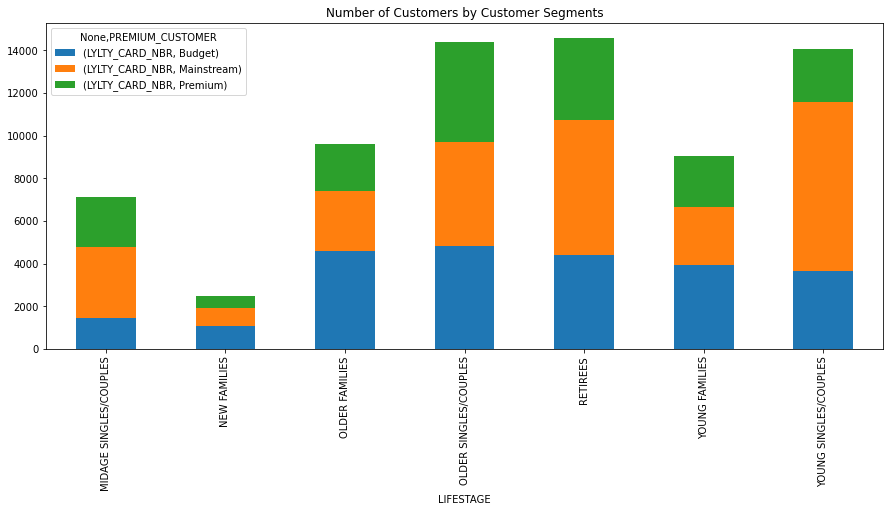

In [49]:
# Visualization
customers_plot = pd.DataFrame(merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
customers_plot.unstack().plot(kind='bar',stacked =True, figsize=(15,6), title = 'Number of Customers by Customer Segments')
# Comment: There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. 
# This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment

In [50]:
# Higher sales may also be driven by more units of chips being bought per customer.
# Let's calculate Average number of units per customer by 'LIFESTAGE' and 'PREMIUM_CUSTOMER'
avg_units = merged_data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).PROD_QTY.sum()/merged_data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).LYLTY_CARD_NBR.nunique()
avg_units = pd.DataFrame(avg_units, columns = {'Average Unit per Customer'})
avg_units.sort_values(by='Average Unit per Customer', ascending = False)

,,Average Unit per Customer
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.255380
Budget,OLDER FAMILIES,9.076773
Premium,OLDER FAMILIES,9.071717
Budget,YOUNG FAMILIES,8.722995
Premium,YOUNG FAMILIES,8.716013
Mainstream,YOUNG FAMILIES,8.638361
Budget,OLDER SINGLES/COUPLES,6.781398
Premium,OLDER SINGLES/COUPLES,6.769116
Mainstream,OLDER SINGLES/COUPLES,6.712021


<AxesSubplot:title={'center':'Average Number of Units per Customer by Customer Segments'}, xlabel='LIFESTAGE'>

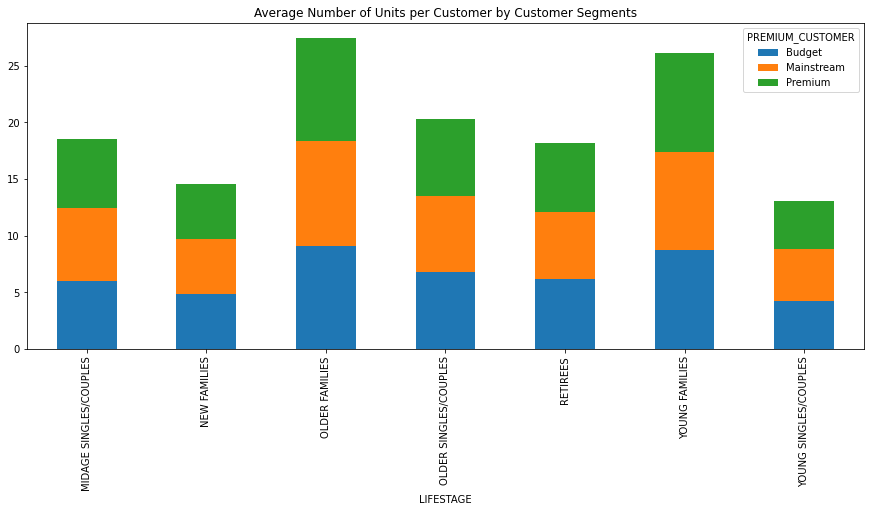

In [51]:
# Visualization
avg_units_plot = merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum()/merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique()
avg_units_plot.unstack().plot(kind='bar', stacked = True, figsize=(15,6), title = 'Average Number of Units per Customer by Customer Segments')
#Comment: Older families and young families in general buy more chips per customer

In [53]:
# Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales
avg_price = merged_data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).TOT_SALES.sum()/merged_data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).PROD_QTY.sum()
avg_price = pd.DataFrame(avg_price, columns = {'Average Price per Unit'})
avg_price.sort_values(by='Average Price per Unit', ascending = False)

Average Price per Unit
PREMIUM_CUSTOMER LIFESTAGE                                     
Mainstream       YOUNG SINGLES/COUPLES                 4.074043
                 MIDAGE SINGLES/COUPLES                3.994449
                 NEW FAMILIES                          3.935887
Budget           RETIREES                              3.932731
                 NEW FAMILIES                          3.931969
Premium          RETIREES                              3.924037
                 OLDER SINGLES/COUPLES                 3.897755
Budget           OLDER SINGLES/COUPLES                 3.887529
Premium          NEW FAMILIES                          3.886168
Mainstream       RETIREES                              3.852986
                 OLDER SINGLES/COUPLES                 3.822753
Premium          MIDAGE SINGLES/COUPLES                3.780823
Budget           YOUNG FAMILIES                        3.761903
Premium          YOUNG FAMILIES                        3.759232
Budget           MIDAGE SINGLES/COUPLES                3.753878
                 OLDER FAMILIES                        3.747969
Mainstream       OLDER FAMILIES                        3.736380
                 YOUNG FAMILIES                        3.722439
Premium          OLDER FAMILIES                        3.717703
                 YOUNG SINGLES/COUPLES                 3.692889
Budget           YOUNG SINGLES/COUPLES                 3.685297

<AxesSubplot:title={'center':'Average Price per Unit Sold by Customer Segments'}, xlabel='LIFESTAGE'>

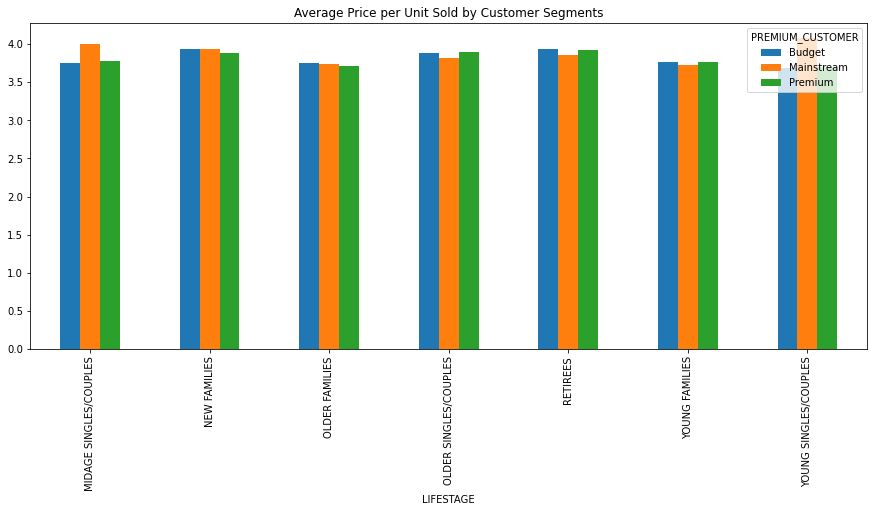

In [54]:
avg_price_plot = merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum()/merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum()
avg_price_plot.unstack().plot(kind='bar', figsize=(15,6), title = 'Average Price per Unit Sold by Customer Segments')
#Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. 
#This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption.
#This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts 

In [55]:
# As the difference in average price per unit isn't large, we can check if this difference is statistically different.
# Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples
# Create a new dataframe 'price_per_unit'
price_per_unit = merged_data
# Create a new column under 'price_per_unit' named 'PRICE'
price_per_unit['PRICE'] = price_per_unit['TOT_SALES']/price_per_unit['PROD_QTY']
# Let's have a look
price_per_unit.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45


In [56]:
# Let's group our data into mainstream and non-mainstream

mainstream = price_per_unit.loc[(price_per_unit['PREMIUM_CUSTOMER'] == 'Mainstream') & ( (price_per_unit['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (price_per_unit['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']
nonMainstream = price_per_unit.loc[(price_per_unit['PREMIUM_CUSTOMER'] != 'Mainstream') & ( (price_per_unit['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (price_per_unit['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']

Text(0.5, 0, 'Price per Unit')

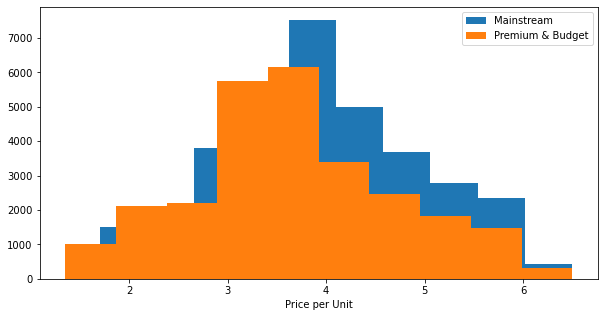

In [57]:
# Compare histograms of mainstream and non-mainstream customers

plt.figure(figsize = (10, 5))
plt.hist(mainstream, label = 'Mainstream')
plt.hist(nonMainstream, label = 'Premium & Budget')
plt.legend()
plt.xlabel('Price per Unit')

In [58]:
print("Mainstream average price per unit: ${:.2f}".format(np.mean(mainstream)))
print("Non-mainstream average price per unit: ${:.2f}".format(np.mean(nonMainstream)))
if np.mean(mainstream) > np.mean(nonMainstream):
    print("Mainstream customers have higher average price per unit.")
else:
    print("Non-mainstream customers have a higher average price per unit.")

Mainstream average price per unit: $4.04
Non-mainstream average price per unit: $3.71
Mainstream customers have higher average price per unit.


In [59]:
# Import library
from scipy.stats import ttest_ind
# Perform t-test 
ttest_ind(mainstream, nonMainstream)

Ttest_indResult(statistic=37.83196107667825, pvalue=2.235645611540966e-309)

The unit price for mainstream customers are significantly higher than that of non-mainstream customers. 

We have found quite a few interesting insights that we can dive deeper into.
We might want to target customers segments that contribute the most to sales to retain them to further increase sales. Let's examine mainstream young singles/couples against the rest of the cutomer segments to see if they prefer any particular brand of chips.

In [60]:
target = merged_data.loc[(merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream'), :]
nonTarget = merged_data.loc[(merged_data['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES' ) & (merged_data['PREMIUM_CUSTOMER'] != 'Mainstream'), :]
target.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
221344,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag Sauce,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
221345,2018-10-02,1,1020,27,7,Smiths Crinkle Original,1,5.7,330,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.7
221346,2019-05-02,1,1020,28,84,GrnWves Plus Btroot Chilli Jam,1,3.1,180,Grainwaves,YOUNG SINGLES/COUPLES,Mainstream,3.1
221347,2018-08-17,1,1163,188,46,Kettle Original,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
221348,2019-02-07,1,1163,189,12,Natural Chip Co Tmato Hrb Spce,1,3.0,175,Natural,YOUNG SINGLES/COUPLES,Mainstream,3.0


# Affinity to brand

In [61]:
# Target Segment
targetBrand = target.loc[:, ['BRAND', 'PROD_QTY']]
targetSum = targetBrand['PROD_QTY'].sum()
targetBrand['Target Brand Affinity'] = targetBrand['PROD_QTY'] / targetSum
targetBrand = pd.DataFrame(targetBrand.groupby('BRAND')['Target Brand Affinity'].sum())

# Non-target segment
nonTargetBrand = nonTarget.loc[:, ['BRAND', 'PROD_QTY']]
nonTargetSum = nonTargetBrand['PROD_QTY'].sum()
nonTargetBrand['Non-Target Brand Affinity'] = nonTargetBrand['PROD_QTY'] / nonTargetSum
nonTargetBrand = pd.DataFrame(nonTargetBrand.groupby('BRAND')['Non-Target Brand Affinity'].sum())

In [62]:
# Merge the two dataframes together
brand_proportions = pd.merge(targetBrand, nonTargetBrand, left_index = True, right_index = True)
brand_proportions.head()

,Target Brand Affinity,Non-Target Brand Affinity
BRAND,,
Burger,0.002926,0.006538
CCs,0.011180,0.018445
Cheetos,0.008033,0.011759
Cheezels,0.017971,0.018904
Cobs,0.044638,0.038449


In [63]:
brand_proportions['Affinity to Brand'] = brand_proportions['Target Brand Affinity'] / brand_proportions['Non-Target Brand Affinity']
brand_proportions.sort_values(by = 'Affinity to Brand', ascending = False)

,Target Brand Affinity,Non-Target Brand Affinity,Affinity to Brand
BRAND,,,
Tyrrells,0.031553,0.025715,1.227016
Twisties,0.046184,0.037933,1.217496
Doritos,0.122761,0.101172,1.213388
Kettle,0.197985,0.166562,1.188658
Tostitos,0.045411,0.038351,1.184091
Pringles,0.119420,0.101111,1.181081
Cobs,0.044638,0.038449,1.160950
Infuzions,0.064679,0.057410,1.126613
Thins,0.060373,0.057160,1.056209


Mainstream young singles/couples are more likely purchasing Tyrrells chips compared to other brands.

# Affinity to pack size

In [64]:
# Target segment 
targetSize = target.loc[:, ['PACK_SIZE', 'PROD_QTY']]
targetSum = targetSize['PROD_QTY'].sum()
targetSize['Target Pack Affinity'] = targetSize['PROD_QTY'] / targetSum
targetSize = pd.DataFrame(targetSize.groupby('PACK_SIZE')['Target Pack Affinity'].sum())

# Non-target segment
nonTargetSize = nonTarget.loc[:, ['PACK_SIZE', 'PROD_QTY']]
nonTargetSum = nonTargetSize['PROD_QTY'].sum()
nonTargetSize['Non-Target Pack Affinity'] = nonTargetSize['PROD_QTY'] / nonTargetSum
nonTargetSize = pd.DataFrame(nonTargetSize.groupby('PACK_SIZE')['Non-Target Pack Affinity'].sum())

In [65]:
# Merge the two dataframes together

pack_proportions = pd.merge(targetSize, nonTargetSize, left_index = True, right_index = True)
pack_proportions.head()

,Target Pack Affinity,Non-Target Pack Affinity
PACK_SIZE,,
70,0.003037,0.006284
90,0.006349,0.012613
110,0.106280,0.089576
125,0.003009,0.005976
134,0.119420,0.101111


In [66]:
pack_proportions['Affinity to Pack'] = pack_proportions['Target Pack Affinity'] / pack_proportions['Non-Target Pack Affinity']
pack_proportions.sort_values(by = 'Affinity to Pack', ascending = False)

,Target Pack Affinity,Non-Target Pack Affinity,Affinity to Pack
PACK_SIZE,,,
270,0.031829,0.025070,1.269599
380,0.032160,0.025711,1.250818
330,0.061284,0.050975,1.202234
110,0.106280,0.089576,1.186483
134,0.119420,0.101111,1.181081
210,0.029124,0.024892,1.170011
135,0.014769,0.012932,1.142078
250,0.014355,0.012863,1.115951
170,0.080773,0.080348,1.005292


Mainstream young singles/couples are more likely purchasing a 270g pack size compared to other pack sizes.

In [67]:
# Which brand offers 270g pack size?
merged_data.loc[merged_data['PACK_SIZE'] == 270, :].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
34,2019-05-18,9,9208,8634,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
79,2018-08-24,39,39167,35639,113,Twisties Chicken,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
125,2019-05-06,54,54305,48304,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
132,2019-05-20,55,55073,48887,113,Twisties Chicken,1,4.6,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
209,2019-01-01,80,80182,78980,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6


In [68]:
# Is Twisties the only brand who sells 270g pack size?
merged_data.loc[merged_data['PACK_SIZE'] == 270, 'BRAND'].unique()

array(['Twisties'], dtype=object)

Twisties is the only brand offering 270g pack size.

# Conclusion

- Sales are highest for (Budget, OLDER FAMILIES), (Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES).
- We found that (Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES) are mainly due to the fact that there are more customers in these segments.
- (Mainstream, YOUNG SINGLES/COUPLES) are more likely to pay more per packet of chips than their premium and budget counterparts.
- They are also more likely to purchase 'Tyrrells' and '270g' pack sizes than the rest of the population.